In [1]:
# Imports
import pandas as pd

# Extracting 

### Extracting table data from the Australian Electoral Commission website

In [2]:
# Setting the url
url = 'https://results.aec.gov.au/20499/Website/HouseDivisionClassifications-20499-NAT.htm'

In [3]:
# Using read_html function in Pandas to automatically scrape any tabular data from the webpage
table = pd.read_html(url)
table

[            Division            State  Enrolment         Demographic  \
 0           Adelaide               SA     109217  Inner Metropolitan   
 1              Aston              VIC      96043  Outer Metropolitan   
 2           Ballarat              VIC     110755          Provincial   
 3              Banks              NSW     104891  Inner Metropolitan   
 4             Barker               SA     105600               Rural   
 ..               ...              ...        ...                 ...   
 146          Whitlam              NSW     112051          Provincial   
 147         Wide Bay              QLD     102856               Rural   
 148            Wills              VIC     113851  Inner Metropolitan   
 149           Wright              QLD      99969               Rural   
 150  Total Enrolment  Total Enrolment   15671551                 NaN   
 
              Previous party Previous seat status        Successful party  \
 0    Australian Labor Party             Marg

'table' is a list containing one table, this can be accessed using table[0]

In [4]:
# Accessing and viewing the dataframe
election_results_df = table[0]
election_results_df.head()

,Division,State,Enrolment,Demographic,Previous party,Previous seat status,Successful party,Seat status
0,Adelaide,SA,109217,Inner Metropolitan,Australian Labor Party,Marginal,Australian Labor Party,Marginal
1,Aston,VIC,96043,Outer Metropolitan,Liberal,Fairly Safe,Liberal,Fairly Safe
2,Ballarat,VIC,110755,Provincial,Australian Labor Party,Marginal,Australian Labor Party,Fairly Safe
3,Banks,NSW,104891,Inner Metropolitan,Liberal,Marginal,Liberal,Marginal
4,Barker,SA,105600,Rural,Liberal,Safe,Liberal,Marginal


# Transforming

### Removing unwanted columns and renaming

In [5]:
# Dropping State column
election_results_df = election_results_df.drop(columns = ["State"])
election_results_df.head()

,Division,Enrolment,Demographic,Previous party,Previous seat status,Successful party,Seat status
0,Adelaide,109217,Inner Metropolitan,Australian Labor Party,Marginal,Australian Labor Party,Marginal
1,Aston,96043,Outer Metropolitan,Liberal,Fairly Safe,Liberal,Fairly Safe
2,Ballarat,110755,Provincial,Australian Labor Party,Marginal,Australian Labor Party,Fairly Safe
3,Banks,104891,Inner Metropolitan,Liberal,Marginal,Liberal,Marginal
4,Barker,105600,Rural,Liberal,Safe,Liberal,Marginal


In [6]:
# Renaming the columns
election_results_df.columns = ['electoral_division', 'enrolment', 'demographic', 'previous_party', 
                               'previous_seat_status', 'successful_party', 'seat_status']
election_results_df.head()

,electoral_division,enrolment,demographic,previous_party,previous_seat_status,successful_party,seat_status
0,Adelaide,109217,Inner Metropolitan,Australian Labor Party,Marginal,Australian Labor Party,Marginal
1,Aston,96043,Outer Metropolitan,Liberal,Fairly Safe,Liberal,Fairly Safe
2,Ballarat,110755,Provincial,Australian Labor Party,Marginal,Australian Labor Party,Fairly Safe
3,Banks,104891,Inner Metropolitan,Liberal,Marginal,Liberal,Marginal
4,Barker,105600,Rural,Liberal,Safe,Liberal,Marginal


### Checking for the presence of NaN values

In [7]:
# Checking for NaN values in the dataframe
election_results_df.isnull()

,electoral_division,enrolment,demographic,previous_party,previous_seat_status,successful_party,seat_status
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
146,False,False,False,False,False,False,False
147,False,False,False,False,False,False,False
148,False,False,False,False,False,False,False
149,False,False,False,False,False,False,False


The results show 5 NaN values in row 150. 

To confirm that these are the only NaN values in the dataframe, the sum of the NaN values will be calculated.

In [8]:
# Summing the NaN values to see how many there are per column
print(election_results_df.isnull().sum())

# Determining the total number of NaN values
print(f"There are {election_results_df.isnull().sum().sum()} NaN values present.")

electoral_division      0
enrolment               0
demographic             1
previous_party          1
previous_seat_status    1
successful_party        1
seat_status             1
dtype: int64
There are 5 NaN values present.


The above summations confirms that there are a total of 5 NaN values present in the data frame, all in the final row. 

In [9]:
election_results_df.tail()

,electoral_division,enrolment,demographic,previous_party,previous_seat_status,successful_party,seat_status
146,Whitlam,112051,Provincial,Australian Labor Party,Fairly Safe,Australian Labor Party,Safe
147,Wide Bay,102856,Rural,Liberal National Party,Safe,Liberal National Party,Fairly Safe
148,Wills,113851,Inner Metropolitan,Australian Labor Party,Safe,Australian Labor Party,Marginal
149,Wright,99969,Rural,Liberal National Party,Safe,Liberal National Party,Fairly Safe
150,Total Enrolment,15671551,NaN,NaN,NaN,NaN,NaN


Row 150 contains a total enrolment calculation and can be removed as it is not needed.

In [10]:
election_results_df = election_results_df.dropna()
election_results_df.tail()

,electoral_division,enrolment,demographic,previous_party,previous_seat_status,successful_party,seat_status
145,Werriwa,108557,Outer Metropolitan,Australian Labor Party,Fairly Safe,Australian Labor Party,Fairly Safe
146,Whitlam,112051,Provincial,Australian Labor Party,Fairly Safe,Australian Labor Party,Safe
147,Wide Bay,102856,Rural,Liberal National Party,Safe,Liberal National Party,Fairly Safe
148,Wills,113851,Inner Metropolitan,Australian Labor Party,Safe,Australian Labor Party,Marginal
149,Wright,99969,Rural,Liberal National Party,Safe,Liberal National Party,Fairly Safe


In [11]:
print(f"There are now {election_results_df.isnull().sum().sum()} NaN values present.")

There are now 0 NaN values present.


### Checking the datatypes

In [12]:
# check datatypes
election_results_df.dtypes

electoral_division      object
enrolment                int64
demographic             object
previous_party          object
previous_seat_status    object
successful_party        object
seat_status             object
dtype: object

### Merging with a second dataframe

Want to add the electoral division id to the election_results dataframe as an index and as a foreign key 

In [13]:
# Reading in electoral division csv
electoral_division_df = pd.read_csv("01-output_electoral_division/electoral_division.csv")
electoral_division_df.head()

,division_id,electoral_division,state
0,179,Adelaide,SA
1,197,Aston,VIC
2,198,Ballarat,VIC
3,103,Banks,NSW
4,180,Barker,SA


In [14]:
# dropping state column
electoral_division_df = electoral_division_df.drop(columns = ["state"])
electoral_division_df.head()

,division_id,electoral_division
0,179,Adelaide
1,197,Aston
2,198,Ballarat
3,103,Banks
4,180,Barker


In [15]:
# merging the dataframes
merged_df = election_results_df.merge(electoral_division_df, how = 'left', on = 'electoral_division')
merged_df.head()

,electoral_division,enrolment,demographic,previous_party,previous_seat_status,successful_party,seat_status,division_id
0,Adelaide,109217,Inner Metropolitan,Australian Labor Party,Marginal,Australian Labor Party,Marginal,179
1,Aston,96043,Outer Metropolitan,Liberal,Fairly Safe,Liberal,Fairly Safe,197
2,Ballarat,110755,Provincial,Australian Labor Party,Marginal,Australian Labor Party,Fairly Safe,198
3,Banks,104891,Inner Metropolitan,Liberal,Marginal,Liberal,Marginal,103
4,Barker,105600,Rural,Liberal,Safe,Liberal,Marginal,180


In [16]:
# Setting the index
merged_df = merged_df.set_index('division_id')
merged_df.head()

,electoral_division,enrolment,demographic,previous_party,previous_seat_status,successful_party,seat_status
division_id,,,,,,,
179,Adelaide,109217,Inner Metropolitan,Australian Labor Party,Marginal,Australian Labor Party,Marginal
197,Aston,96043,Outer Metropolitan,Liberal,Fairly Safe,Liberal,Fairly Safe
198,Ballarat,110755,Provincial,Australian Labor Party,Marginal,Australian Labor Party,Fairly Safe
103,Banks,104891,Inner Metropolitan,Liberal,Marginal,Liberal,Marginal
180,Barker,105600,Rural,Liberal,Safe,Liberal,Marginal


### Removing electoral_division column

No longer require the electoral_division column as the division_id index now uniquely identifies each row.

In [17]:
merged_df = merged_df.drop(columns = ["electoral_division"])
merged_df.head()

,enrolment,demographic,previous_party,previous_seat_status,successful_party,seat_status
division_id,,,,,,
179,109217,Inner Metropolitan,Australian Labor Party,Marginal,Australian Labor Party,Marginal
197,96043,Outer Metropolitan,Liberal,Fairly Safe,Liberal,Fairly Safe
198,110755,Provincial,Australian Labor Party,Marginal,Australian Labor Party,Fairly Safe
103,104891,Inner Metropolitan,Liberal,Marginal,Liberal,Marginal
180,105600,Rural,Liberal,Safe,Liberal,Marginal


# Exploratory Data Analysis

Confirming there are no other null values.

In [18]:
merged_df.isnull().sum()

enrolment               0
demographic             0
previous_party          0
previous_seat_status    0
successful_party        0
seat_status             0
dtype: int64

In [19]:
# Viewing the values of the demographics column

merged_df['demographic'].value_counts()

Outer Metropolitan    44
Inner Metropolitan    44
Rural                 40
Provincial            22
Name: demographic, dtype: int64

Will compare the 'previous_party' column and 'successful_party' column using a grouped bar chart.

In [20]:
# Viewing the values in 'previous_party' column and the frequency

merged_df['previous_party'].value_counts()

Liberal                      59
Australian Labor Party       54
Liberal National Party       22
The Nationals                 9
Independent                   2
Country Liberals (NT)         1
Palmer United Party           1
The Greens                    1
Katter's Australian Party     1
Name: previous_party, dtype: int64

In [21]:
# Viewing the values in 'successful_party' column and the frequency

merged_df['successful_party'].value_counts()

Australian Labor Party       69
Liberal                      45
Liberal National Party       21
The Nationals                10
Independent                   2
The Greens                    1
Katter's Australian Party     1
Nick Xenophon Team            1
Name: successful_party, dtype: int64

### Plotting the results

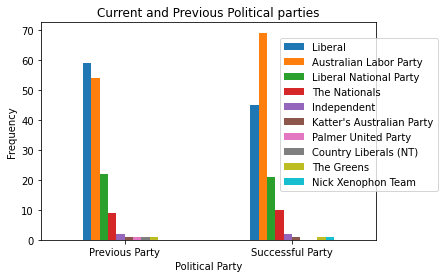

In [22]:
# Plotting the frequency of each party as a grouped bar plot. Grouping by previous party and successful party.

import matplotlib.pyplot as plt

plotdata = pd.DataFrame({
    "Liberal":[59,45],
    "Australian Labor Party":[54,69],
    "Liberal National Party":[22,21],
    "The Nationals":[9,10],
    "Independent":[2,2],
    "Katter's Australian Party":[1,1],
    "Palmer United Party":[1,0],
    "Country Liberals (NT)":[1,0],
    "The Greens":[1,1],
    "Nick Xenophon Team":[0,1]},
    index=["Previous Party", "Successful Party"])

plotdata.plot(kind="bar")
plt.xticks(rotation = 0)
plt.title("Current and Previous Political parties")
plt.xlabel("Political Party")
plt.ylabel("Frequency")
plt.legend(loc="upper center", bbox_to_anchor=(0.95, 0.95), ncol=1)

plt.show()

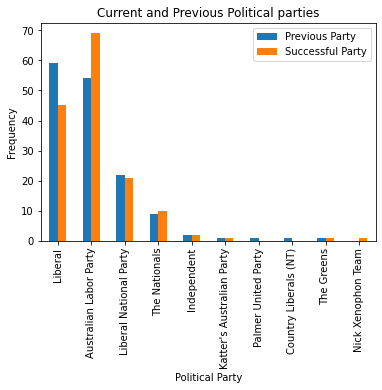

In [23]:
# Plotting the frequency of each party as a grouped bar plot. Grouping by each party.

plotdata = pd.DataFrame({
    "Previous Party":[59,54,22,9,2,1,1,1,1,0],
    "Successful Party":[45,69,21,10,2,1,0,0,1,1]},
    index=["Liberal",
    "Australian Labor Party",
    "Liberal National Party",
    "The Nationals",
    "Independent",
    "Katter's Australian Party",
    "Palmer United Party",
    "Country Liberals (NT)",
    "The Greens",
    "Nick Xenophon Team"])

plotdata.plot(kind="bar")
plt.title("Current and Previous Political parties")
plt.xlabel("Political Party")
plt.ylabel("Frequency")
plt.show()

# Exporting to csv

In [24]:
# Exporting dataframe to csv
merged_df.to_csv("02-output_election_results/02-election_results.csv")